# Verkenning voor opdracht 1: analyse van tijdseries. 

Het doel van deze opdracht is om bekend te raken met de data (van FlickBike) en om wat ervaring op te doen met plot-functies die later misschien relevant worden. Om een goed voorspellend model te kunnen maken in opdracht 2, die volgende week begint, is het essentieel dat je om kunt gaan met cyclische variatie die in data zit. Daarom begint dit notebook met wat algemene voorbeelden van seizoenseffecten. 

## Hoe detecteer je seizoensvariaties (seasonality) in een plot?

Een autocorrelatieplot (soms ACF - Autocorrelation Function of ACF-plot genaamd) helpt om seizoenseffecten te meten. Zo'n plot toont of observaties systematisch correleren met eerdere observaties. Als er seizoenseffecten zijn, dan kun je dat in de plot zien doordat waardes pieken op momenten dat observatiepatronen zich herhalen.  



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import os

datapath="../input/taaiv2dip"


## Voorbeeld 1: Dagelijkse temperatuur (Celsius) in Melbourne

Data inladen: 

In [2]:
temp_data = pd.read_csv(datapath+ '/daily-minimum-temperatures-in-me.csv', header=0)

Inspectie van de data door de eerste 5 rijen van de CSV te tonen. 

In [3]:
temp_data.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


De datum (Date) is gecodeerd als een string. Die converteren we eerst naar Datetime. 

In [4]:
type(list(temp_data["Date"].values)[0])

str

In [5]:
temp_data["Date"] = pd.to_datetime(temp_data["Date"], format="%Y-%m-%d")

In [6]:
type(list(temp_data["Date"].values)[0])

numpy.datetime64

We gebruiken de sorteer-functie van pandas om de data netje te sorteren, oplopend op datum. 

In [7]:
temp_data = temp_data.sort_values(by=["Date"])

Plot van de data

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

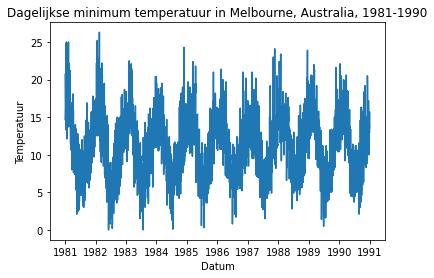

In [9]:
plt.plot(temp_data["Date"], temp_data["Daily minimum temperatures in Melbourne, Australia, 1981-1990"])
plt.title("Dagelijkse minimum temperatuur in Melbourne, Australia, 1981-1990")
plt.xlabel("Datum")
plt.ylabel("Temperatuur")
plt.show()

Je kunt duidelijk zien in de plot van de data dat er sprake is van een seizoenseffect: er is sprake van een cyclus, een zich steeds herhalend patroon van stijgende en dalende temperaturen. Dat zou je natuurlijk ook verwachten van een land waarin er verschillen zijn tussen seizoenen. Je kunt in deze plot met de hand tellen hoe veel cycli er zijn (11?), of je kunt het beredeneren op grond van de kennis die we hebben van winter-zomer-verschillen. Maar niet in elke data kun je dat zo zien, of weet je vantevoren wat je kunt verwachten. 

Een ACF-plot vertelt je de cycli. 

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

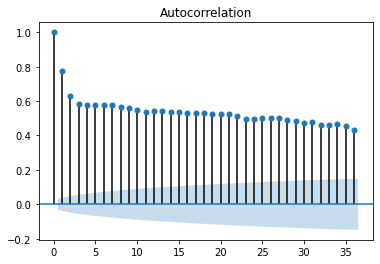

In [11]:
plot_acf(temp_data["Daily minimum temperatures in Melbourne, Australia, 1981-1990"])
plt.show()

De x-as toont de correlatie van een observatie met de observatie van een willekeurig aantal tijdsmomenten geleden (*autocorrelatie*). Een correlatie van 1 (of -1) is heel sterk, een correlatie van 0 is niet-bestaand. In deze ACF-plots wordt ook een betrouwbaarheidsinterval getoond, door middel van de lichtblauwe zone. Als een correlatie zich buiten die zone bevindt, dan is er waarschijnlijk sprake van een daadwerkelijk significante autocorrelatie. In deze plot zie je voor een lag van 0 een correlatie van 1 (want iedere observatie correleert natuurlijk met zichzelf), er is enigszins correlatie met lag = 1 (want een temperatuur correleert waarschijnlijk behoorlijk met de temperatuur van de dag ervoor), etcetera. 

API: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

Door het aantal lags (dagen verschil tussen twee observaties) te vergroten krijg je een genuanceerd beeld: 

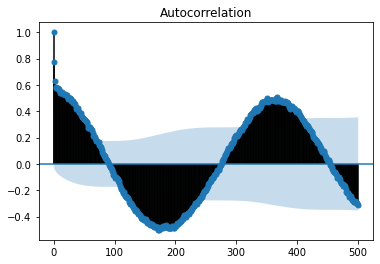

In [12]:
plot_acf(temp_data["Daily minimum temperatures in Melbourne, Australia, 1981-1990"], lags=500)
plt.show()

Als we als maat nemen dat observaties maar in 1% van de gevallen door kans verklaard kan worden (maw: we accepteren dat de test 1 op de 100 keer een fout resultaat geeft):

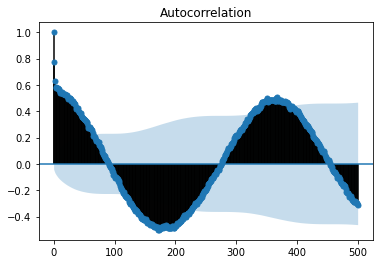

In [13]:
plot_acf(temp_data["Daily minimum temperatures in Melbourne, Australia, 1981-1990"], lags=500, alpha=.01)
plt.show()

**Vraag** Wat is de periodiciteit van deze data? Hoe kun je dat uit een ACF-plot aflezen? 

## Voorbeeld 2: Luchtvaartpassagiers 

Voor het tweede voorbeeld werken we met data van luchtvaartpassagiers. 

In [14]:
airline_data = pd.read_csv(datapath+'/international-airline-passengers.csv', header=0)
airline_data.head()

,Month,International airline passengers: monthly totals in thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


De plot van de data laat al zien dat er seizoenseffecten zichtbaar zijn. 

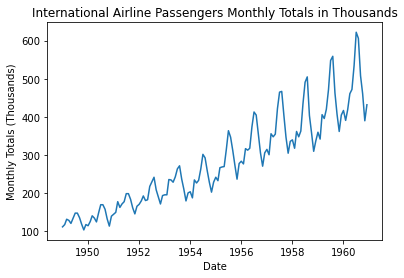

In [15]:
airline_data["Month"] = pd.to_datetime(airline_data["Month"], format="%Y-%m")

plt.plot(airline_data["Month"], airline_data["International airline passengers: monthly totals in thousands"])
plt.title("International Airline Passengers Monthly Totals in Thousands")
plt.xlabel("Date")
plt.ylabel("Monthly Totals (Thousands)")
plt.show()

Is hier sprake van *additieve* of van *multiplicatieve* autocorrelatie? Met andere woorden, wordt het effect steeds sterker al naar gelang de tijd vordert (= multiplicatief)?

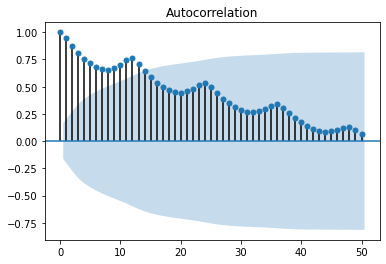

In [21]:
plot_acf(airline_data["International airline passengers: monthly totals in thousands"], lags=50)
plt.show()

**Vraag** Wat is de periodiciteit in deze data? Hoe kun je dat aflezen? 


## Voorbeeld 3: Cadeaubonnen
De data in deze dataset gaat over de verkoop van cadeaubonnen. 

In [17]:
gift_data = pd.read_csv(datapath+'/all_data_gift_certificates.csv', header=0)
gift_data.head()

,BeginTime,Count
0,2016-01-01 00:00:00,0
1,2016-01-01 01:00:00,1
2,2016-01-01 02:00:00,2
3,2016-01-01 03:00:00,3
4,2016-01-01 04:00:00,1


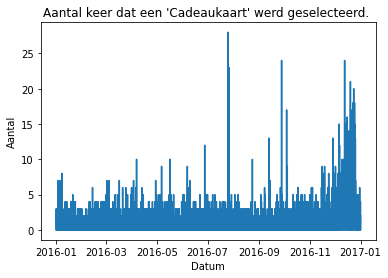

In [18]:
gift_data["BeginTime"] = pd.to_datetime(gift_data["BeginTime"], format="%Y-%m-%d %H:%M:%S")
plt.plot(gift_data["BeginTime"], gift_data["Count"])
plt.title("Aantal keer dat een 'Cadeaukaart' werd geselecteerd. ")
plt.xlabel("Datum")
plt.ylabel("Aantal")
plt.show()

In deze time series plot kun je nauwelijks een seizoenseffect herkennen. Maar op een ACF-plot wordt het opeens heel erg duidelijk: 

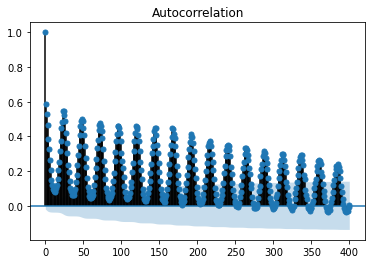

In [19]:
plot_acf(gift_data["Count"], lags=400)
plt.show()

**Vraag:** Wat is de periodiciteit van deze dataset?

## Opdracht: Data van fietsverhuur

Je kunt nu aan de slag met de data van de fietsverhuur die we gebruiken. We willen die data niet publiek toegankelijk maken, maar de data is beschikbaar op ([Canvas](https://canvas.hu.nl/files/850822/download?download_frd=1). Je kunt deze Kaggle kernel exporteren naar een iPython / Jupyter notebook (zie `file` / `Download notebook`) of in een eigen Python-omgeving met Pandas werken. 

**Vraag 1:** Produceer een plot van verhuur-per-dag voor deze dataset. 

(je moet code schrijven voor deze opdracht die de verkoop samenvat per dag!)

**Vraag 2:** Wat is de periodiciteit van deze dataset? 

# Losse links

1. Over additive versus multiplicatieve tijdsseries. 

https://www.r-bloggers.com/is-my-time-series-additive-or-multiplicative/

2. ACFs in R

https://www.rdocumentation.org/packages/stats/versions/3.5.3/topics/plot.acf


3. Als er meerdere seizoenseffecten te verwachten zijn....

https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a